In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
convertedData = df.copy()  
convertedData['Disease']= le.fit_transform(df['Disease'].astype(str))
display(convertedData.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


In [5]:
display(df.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [6]:
X = convertedData.drop(columns=["Disease"])
Y = convertedData["Disease"]
display(X,Y)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


0      4
1      1
2      3
3      1
4      3
      ..
481    1
482    3
483    0
484    1
485    1
Name: Disease, Length: 486, dtype: int64

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(x_train,x_test,y_train,y_test)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
248,0.584821,0.948052,0.735296,0.697893,0.635785,0.311444,0.892952,0.601533,0.413237,0.983949,...,0.075168,0.657813,0.828427,0.633489,0.083666,0.513527,0.394577,0.649104,0.350779,0.090244
250,0.067539,0.244915,0.898678,0.331948,0.432998,0.220022,0.230240,0.955183,0.048879,0.255637,...,0.487907,0.795397,0.416410,0.919639,0.574186,0.838801,0.615716,0.629545,0.230005,0.682480
355,0.370998,0.498273,0.539020,0.925915,0.494863,0.326262,0.687310,0.748577,0.755643,0.461487,...,0.822256,0.417230,0.599345,0.055746,0.277321,0.213500,0.410551,0.426922,0.848912,0.475553
128,0.441933,0.710156,0.240327,0.500876,0.980749,0.698944,0.873786,0.942648,0.384247,0.520758,...,0.993278,0.932629,0.549699,0.800070,0.952936,0.832549,0.453051,0.880088,0.582067,0.652750
36,0.880527,0.627937,0.754767,0.367098,0.023803,0.826507,0.371493,0.353245,0.409727,0.678572,...,0.196764,0.305544,0.054022,0.808576,0.747152,0.871126,0.950581,0.099220,0.601535,0.337705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.385531,0.046342,0.760448,0.809340,0.178552,0.203011,0.253969,0.298788,0.179456,0.159168,...,0.846148,0.486751,0.310820,0.235894,0.785793,0.012179,0.422505,0.848222,0.516525,0.903481
326,0.157402,0.877183,0.352670,0.651506,0.280112,0.419201,0.865163,0.054325,0.444783,0.601815,...,0.800184,0.851108,0.916675,0.004680,0.683861,0.038304,0.617119,0.861065,0.947309,0.061762
258,0.196614,0.768872,0.597047,0.050616,0.813283,0.110133,0.413463,0.659641,0.609637,0.934247,...,0.378086,0.182845,0.998426,0.068367,0.195966,0.487431,0.605885,0.411420,0.737074,0.679197
249,0.853958,0.861706,0.418246,0.181573,0.587539,0.703898,0.793021,0.051399,0.845621,0.662326,...,0.236197,0.172982,0.347442,0.689315,0.095323,0.775687,0.783619,0.363074,0.675977,0.550542


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
400,0.011153,0.333303,0.494965,0.087218,0.334558,0.888125,0.438871,0.605348,0.565240,0.368234,...,0.214138,0.279342,0.934806,0.158838,0.681542,0.490414,0.188199,0.184875,0.150426,0.565625
189,0.482478,0.251622,0.785922,0.503933,0.735398,0.975554,0.719661,0.408055,0.505069,0.346269,...,0.511015,0.589198,0.126564,0.827923,0.977302,0.380134,0.484526,0.932114,0.425949,0.269725
351,0.966673,0.525741,0.446528,0.098151,0.692703,0.105721,0.580675,0.705472,0.484739,0.492840,...,0.333704,0.541746,0.379122,0.583249,0.691290,0.044129,0.836732,0.075589,0.911209,0.187600
480,0.596137,0.071545,0.654680,0.980213,0.503338,0.987548,0.775286,0.201622,0.263525,0.356106,...,0.624223,0.808920,0.798004,0.976612,0.552450,0.382807,0.754216,0.234421,0.355834,0.132999
147,0.143475,0.734542,0.889094,0.401655,0.650074,0.573873,0.658022,0.756543,0.821367,0.468815,...,0.587732,0.893898,0.392214,0.938264,0.844287,0.174114,0.564205,0.646957,0.839247,0.095429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.641782,0.801393,0.318412,0.930426,0.400631,0.760329,0.012717,0.545819,0.320807,0.646610,...,0.683358,0.587064,0.077189,0.079718,0.373372,0.264244,0.887102,0.445266,0.333053,0.829157
288,0.556057,0.509058,0.307157,0.394574,0.113036,0.725622,0.066219,0.583806,0.333777,0.333407,...,0.397318,0.762200,0.845323,0.935869,0.672969,0.647509,0.051040,0.542835,0.379512,0.015105
440,0.672264,0.997242,0.518058,0.066733,0.721501,0.714723,0.936681,0.518489,0.957489,0.563709,...,0.690606,0.319083,0.531679,0.077064,0.069895,0.886687,0.626263,0.201795,0.421323,0.119177
404,0.826093,0.642287,0.754568,0.455210,0.897493,0.826990,0.780799,0.074099,0.272947,0.073813,...,0.047281,0.091320,0.198595,0.638517,0.630917,0.898692,0.946310,0.881490,0.117515,0.269281


248    1
250    4
355    3
128    4
36     1
      ..
172    1
326    1
258    1
249    1
153    1
Name: Disease, Length: 388, dtype: int64

400    5
189    1
351    1
480    1
147    1
      ..
199    1
288    1
440    1
404    1
234    1
Name: Disease, Length: 98, dtype: int64

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [13]:
knn_preds = knn.predict(x_test)
display(knn_preds)

array([0, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 4, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 3])

In [15]:
print(classification_report(y_test,knn_preds,zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        22
           1       0.69      0.87      0.77        55
           2       0.00      0.00      0.00         3
           3       0.25      0.14      0.18         7
           4       0.33      0.12      0.18         8
           5       0.00      0.00      0.00         3

    accuracy                           0.63        98
   macro avg       0.31      0.28      0.28        98
weighted avg       0.56      0.63      0.58        98



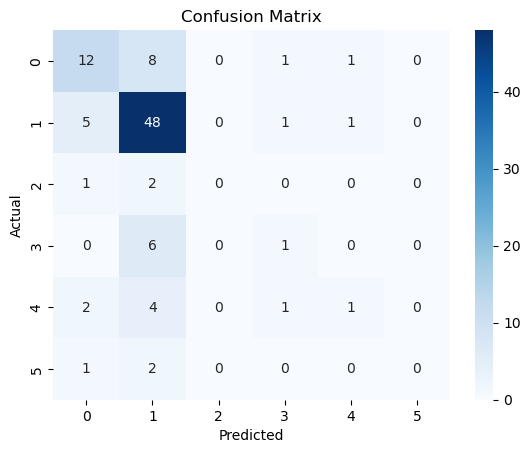

In [17]:
sns.heatmap(confusion_matrix(y_test,knn_preds), annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
corr = convertedData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,-0.051997,0.057148,0.053395,0.017041,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289,-0.131351
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,-0.047341,-0.038441,-0.019163,0.062282,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469,-0.032747
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,0.043210,-0.039921,-0.022898,-0.023256,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146,-0.041784
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,-0.006257,0.132941,-0.059136,0.067048,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405,-0.102648
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,-0.077885,0.010977,-0.027616,0.005510,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215,0.241368
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,0.005705,-0.080650,-0.060273,-0.018568,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739,0.254369
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,-0.050393,0.035657,-0.075840,-0.024565,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921,0.179136
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,0.023160,-0.020803,0.045616,-0.051330,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672,0.024293
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,-0.066917,0.018533,0.026032,0.034992,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203,-0.106686
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,-0.085051,0.007691,0.051672,-0.064274,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146,-0.012350


In [19]:
mse = mean_squared_error(y_test,knn_preds)
r2Score = r2_score(y_test,knn_preds)
print("MSE : ",mse,"\nR2 Score : ",r2Score,"\nAccuracy:", accuracy_score(y_test, knn_preds))

MSE :  2.1122448979591835 
R2 Score :  -0.2684299380979178 
Accuracy: 0.6326530612244898


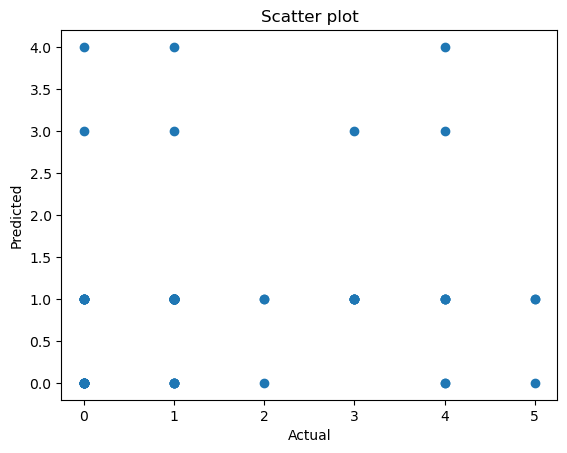

In [20]:
plt.scatter(y_test,knn_preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot")
plt.show()